In [1]:
import pandas as pd

# 날짜 컬럼 방지
def read_csv_auto_dates(path):
    # 1) 전체 파일을 먼저 읽기
    temp = pd.read_csv(path, low_memory=False)
    
    # 2) _at 로 끝나는 컬럼 자동 탐지
    date_cols = [col for col in temp.columns if col.endswith('_at')]
    
    # 3) 다시 날짜 컬럼을 datetime 으로 읽기
    return pd.read_csv(path, parse_dates=date_cols, low_memory=False)

# Load Files (전처리)
Acquisitions = read_csv_auto_dates("./clean_data_v1/clean_acquisitions_final.csv")
Degrees = read_csv_auto_dates("./clean_data_v1/clean_degrees_final.csv")
FundingRounds = read_csv_auto_dates("./clean_data_v1/clean_fr_final.csv")
Funds = read_csv_auto_dates("./clean_data_v1/clean_funds_final.csv")
Investments = read_csv_auto_dates("./clean_data_v1/clean_investments_final.csv")
Ipos = read_csv_auto_dates("./clean_data_v1/clean_ipos_final.csv")
Milestones = read_csv_auto_dates("./clean_data_v1/clean_milestones_final.csv")
Objects = read_csv_auto_dates("./clean_data_v1/clean_objects_final.csv")
People = read_csv_auto_dates("./clean_data_v1/clean_people_final.csv")
Offices = read_csv_auto_dates("./clean_data_v1/clean_offices_final.csv")
Relationships = read_csv_auto_dates("./clean_data_v1/clean_relationships_final.csv")

# Load Files (작업용 전처리)
company = read_csv_auto_dates("./entity_type/objects_company.csv")
finorg = read_csv_auto_dates("./entity_type/objects_finorg.csv")
person = read_csv_auto_dates("./entity_type/objects_person.csv")
product = read_csv_auto_dates("./entity_type/objects_product.csv")

# Load Files (join)
acqusitions_company = read_csv_auto_dates("./EDA's join/acqusitions_company.csv")
fr_company = read_csv_auto_dates("./EDA's join/fr_company.csv")
ipos_company = read_csv_auto_dates("./EDA's join/ipos_company.csv")
startup_system = read_csv_auto_dates("./EDA's join/startup_system.csv")

print("="*60)
print("Dataset 로드 완료!")
print("="*60)

Dataset 로드 완료!


In [2]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta


# 한글 안깨지게 맥북용
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)

# funding_round 분석 : 스타트업의 성장 특징 
- 산업별 투자 라운드 상승 속도 (category_code)
- 지역별 투자 라운드 상승 속도 (obj_city_fixed)
- 단계별 투자가 활발한 라운드 (cat_fr_type)
    - 참여자 수 (participants)
    - 투자 금액  (raised_amount_usd)
- 투자라운드별 회사 제품 갯수 변화

In [3]:
fr_company

,funding_round_id,fr_c_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,participants,is_first_round,...,cat_obj_status,obj_overview_fixed,cat_obj_overview,obj_region_fixed,cat_obj_region,obj_state_filled,obj_city_fixed,obj_category_filled,is_obj_funding_total_usd_private,is_obj_funding_rounds_private
0,1,c:4,2006-12-01,series-b,b,8500000.0,NaN,NaN,2,0,...,acquired,digg is a user driven social content website. ...,Software & Technology,sf bay area,sf bay area,CA,san francisco,news,0.0,0.0
1,1,c:4,2006-12-01,series-b,b,8500000.0,NaN,NaN,2,0,...,acquired,digg is a user driven social content website. ...,Software & Technology,sf bay area,sf bay area,CA,san francisco,news,0.0,0.0
2,2,c:5,2004-09-01,angel,angel,500000.0,NaN,NaN,2,0,...,ipo,facebook is the world's largest social network...,Software & Technology,sf bay area,sf bay area,CA,menlo park,social,0.0,0.0
3,2,c:5,2004-09-01,angel,angel,500000.0,NaN,NaN,2,0,...,ipo,facebook is the world's largest social network...,Software & Technology,sf bay area,sf bay area,CA,menlo park,social,0.0,0.0
4,3,c:5,2005-05-01,series-a,a,12700000.0,115000000.0,NaN,3,0,...,ipo,facebook is the world's largest social network...,Software & Technology,sf bay area,sf bay area,CA,menlo park,social,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100637,57948,c:211890,2013-12-12,series-a,a,3000000.0,NaN,NaN,1,1,...,operating,bitstrips is a new way to interact online that...,Software & Technology,toronto,toronto,ON,toronto,web,0.0,0.0
100638,57949,c:267427,2010-02-06,venture,partial,570000.0,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100639,57950,c:261728,2010-02-06,venture,unattributed,2184100.0,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100640,57951,c:285864,2013-12-12,series-a,a,790783.0,NaN,NaN,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13824/3073872547.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


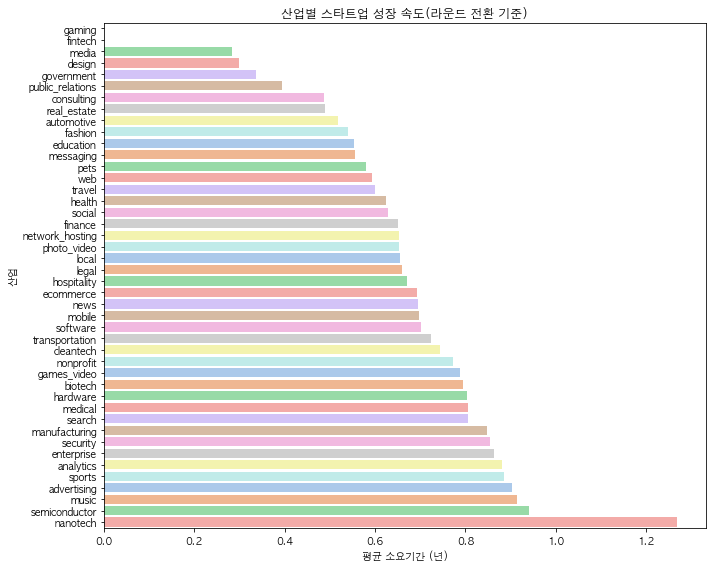

In [28]:
# 산업별 투자 라운드 상승 속도

# 회사별, 날짜순 정렬
fr_company = fr_company.sort_values(['fr_c_id', 'funded_at'])
# 회사별 이전 라운드 날짜
fr_company['pre_funded_at'] = fr_company.groupby('fr_c_id')['funded_at'].shift(1)
# 라운드 간 날짜 차이 (일, 년도)
fr_company['round_gap_days'] = (fr_company['funded_at'] - fr_company['pre_funded_at']).dt.days
fr_company['round_gap_years'] = fr_company['round_gap_days'] / 365

# 이전 라운드가 있는 행만 사용
fr_company_valid = fr_company.dropna(subset=['round_gap_years'])

# 같은 라운드 단계(Same Stage) 제거
fr_company_valid = fr_company_valid[
    fr_company_valid['cat_fr_type'] != fr_company_valid['cat_fr_type'].shift(1)
]

# 회사별 투자 라운드 속도
company_fr_tempo = (fr_company_valid.groupby("fr_c_id")
                    .agg(
                        avg_round_gap_years = ('round_gap_years', 'mean'),
                        obj_category_filled = ('obj_category_filled', 'first')
                    )
                    .reset_index()
                    )
# 산업별 회사별 투자 라운드 속도
industry_fr_tempo = (company_fr_tempo
                     .groupby('obj_category_filled')['avg_round_gap_years']
                     .mean()
                     .reset_index()
                     .sort_values('avg_round_gap_years')
                     )

# 시각화 
plt.figure(figsize=(10, 8))
sns.barplot(
    data=industry_fr_tempo,
    x='avg_round_gap_years',
    y='obj_category_filled',
    palette='pastel'
)
plt.title('산업별 스타트업 성장 속도(라운드 전환 기준)')
plt.xlabel('평균 소요기간 (년)')
plt.ylabel('산업')
plt.tight_layout()
plt.show()

/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13824/1679293234.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


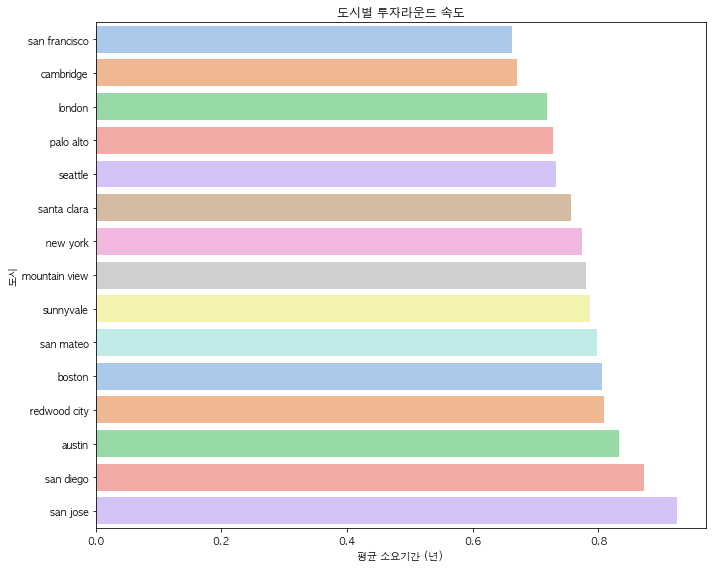

In [5]:
# 도시별 투자 라운드 상승 속도

# 회사별, 날짜순 정렬
fr_company = fr_company.sort_values(['fr_c_id', 'funded_at'])
# 회사별 이전 라운드 날짜
fr_company['pre_funded_at'] = fr_company.groupby('fr_c_id')['funded_at'].shift(1)
# 라운드 간 날짜 차이 (일, 년도)
fr_company['round_gap_days'] = (fr_company['funded_at'] - fr_company['pre_funded_at']).dt.days
fr_company['round_gap_years'] = fr_company['round_gap_days'] / 365

# 이전 라운드가 있는 행만 사용
fr_company_valid = fr_company.dropna(subset=['round_gap_years'])

# 같은 라운드 단계(Same Stage) 제거
fr_company_valid = fr_company_valid[
    fr_company_valid['cat_fr_type'] != fr_company_valid['cat_fr_type'].shift(1)
]

# 회사별 투자 라운드 속도
company_fr_tempo = (fr_company_valid.groupby("fr_c_id")
                    .agg(
                        avg_round_gap_years = ('round_gap_years', 'mean'),
                        obj_city_fixed = ('obj_city_fixed', 'first')
                    )
                    .reset_index()
                    )
# 도시별 회사별 투자 라운드 속도
industry_fr_tempo = (company_fr_tempo
                     .groupby('obj_city_fixed')['avg_round_gap_years']
                     .mean()
                     .reset_index()
                     .sort_values('avg_round_gap_years')
                     )

# 투자가 활발한 도시 15개
top_cities = (
    company_fr_tempo['obj_city_fixed']
    .value_counts()
    .head(15)
    .index
)

industry_fr_tempo = industry_fr_tempo[industry_fr_tempo['obj_city_fixed'].isin(top_cities)]


# 시각화 
plt.figure(figsize=(10, 8))
sns.barplot(
    data=industry_fr_tempo,
    x='avg_round_gap_years',
    y='obj_city_fixed',
    palette='pastel'
)
plt.title('도시별 투자라운드 속도')
plt.xlabel('평균 소요기간 (년)')
plt.ylabel('도시')
plt.tight_layout()
plt.show()

/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13824/1603512802.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


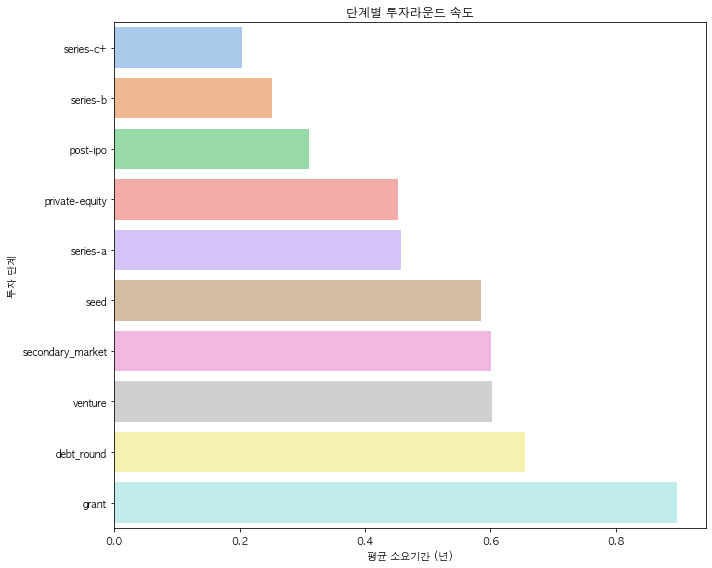

In [6]:
# 단계별 투자 라운드 상승 속도

# 투자 라운드별, 날짜순 정렬
fr_company = fr_company.sort_values(['fr_c_id', 'funded_at'])
# 투자 라운드별 이전 라운드 날짜
fr_company['next_funded_at'] = fr_company.groupby('fr_c_id')['funded_at'].shift(-1)
# 라운드 간 날짜 차이 (일, 년도)
fr_company['round_gap_days'] = (fr_company['next_funded_at'] - fr_company['funded_at']).dt.days
fr_company['round_gap_years'] = fr_company['round_gap_days'] / 365

# 이전 라운드가 있는 행만 사용
fr_company_valid = fr_company.dropna(subset=['round_gap_years'])

# 같은 라운드 단계(Same Stage) 제거
fr_company_valid = fr_company_valid[
    fr_company_valid['cat_fr_type'] != fr_company_valid['cat_fr_type'].shift(1)
]

# 5) 단계별 투자 라운드 속도 
stage_fr_tempo = (
    fr_company_valid
    .groupby('cat_fr_type')['round_gap_years']
    .mean()
    .reset_index()
    .sort_values('round_gap_years')
)

# 시각화 
plt.figure(figsize=(10, 8))
sns.barplot(
    data=stage_fr_tempo,
    x='round_gap_years',
    y='cat_fr_type',
    palette='pastel'
)
plt.title('단계별 투자라운드 속도')
plt.xlabel('평균 소요기간 (년)')
plt.ylabel('투자 단계')
plt.tight_layout()
plt.show()

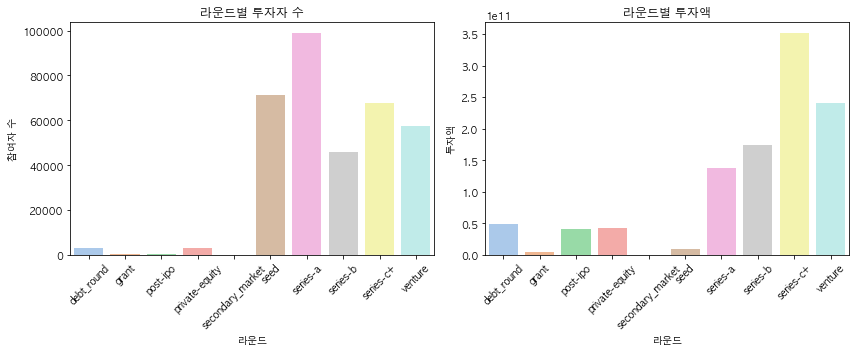

In [7]:
# 단계별 투자가 활발한 라운드
# 참여자 수 기준
active_round_cnt = (fr_company
                .groupby('cat_fr_type')['participants']
                .sum()
                .reset_index()
                )
# 투자 금액 
active_round_amount = (fr_company
                       .groupby('cat_fr_type')['raised_amount_usd']
                       .sum()
                       .reset_index()
                       )

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 단계별 참여자 수 수평 막대 그래프
sns.barplot(data=active_round_cnt, x='cat_fr_type', y='participants', palette='pastel', hue='cat_fr_type', ax=axes[0])
axes[0].set_title('라운드별 투자자 수')
axes[0].set_xlabel('라운드')
axes[0].set_ylabel('참여자 수')
axes[0].tick_params(axis='x', rotation=45)


# 단계별 투자액 수평 막대 그래프
sns.barplot(data=active_round_amount, x='cat_fr_type', y='raised_amount_usd', palette='pastel', hue='cat_fr_type', ax=axes[1])
axes[1].set_title('단계별 총 투자액')
axes[1].set_title('라운드별 투자액')
axes[1].set_xlabel('라운드')
axes[1].set_ylabel('투자액')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [8]:
fr_company

,funding_round_id,fr_c_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,participants,is_first_round,...,cat_obj_region,obj_state_filled,obj_city_fixed,obj_category_filled,is_obj_funding_total_usd_private,is_obj_funding_rounds_private,pre_funded_at,round_gap_days,round_gap_years,next_funded_at
1855,888,c:1,2005-10-01,series-a,a,5250000.0,NaN,NaN,2,0,...,seattle,WA,seattle,web,0.0,0.0,NaT,0.0,0.000000,2005-10-01
1856,888,c:1,2005-10-01,series-a,a,5250000.0,NaN,NaN,2,0,...,seattle,WA,seattle,web,0.0,0.0,2005-10-01,457.0,1.252055,2007-01-01
1857,889,c:1,2007-01-01,series-b,b,9500000.0,NaN,NaN,3,0,...,seattle,WA,seattle,web,0.0,0.0,2005-10-01,0.0,0.000000,2007-01-01
1858,889,c:1,2007-01-01,series-b,b,9500000.0,NaN,NaN,3,0,...,seattle,WA,seattle,web,0.0,0.0,2007-01-01,0.0,0.000000,2007-01-01
1859,889,c:1,2007-01-01,series-b,b,9500000.0,NaN,NaN,3,0,...,seattle,WA,seattle,web,0.0,0.0,2007-01-01,504.0,1.380822,2008-05-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11282,5765,c:9989,2009-02-01,angel,angel,500000.0,NaN,NaN,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2008-03-12,NaN,NaN,NaT
6400,3253,c:9994,2007-01-01,angel,seed,250000.0,NaN,NaN,1,0,...,NaN,NaN,NaN,advertising,0.0,0.0,NaT,486.0,1.331507,2008-05-01
12051,6112,c:9994,2008-05-01,angel,seed,250000.0,NaN,NaN,1,1,...,NaN,NaN,NaN,advertising,0.0,0.0,2007-01-01,NaN,NaN,NaT
6414,3264,c:9995,2008-08-25,angel,angel,750000.0,NaN,6000000.0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT


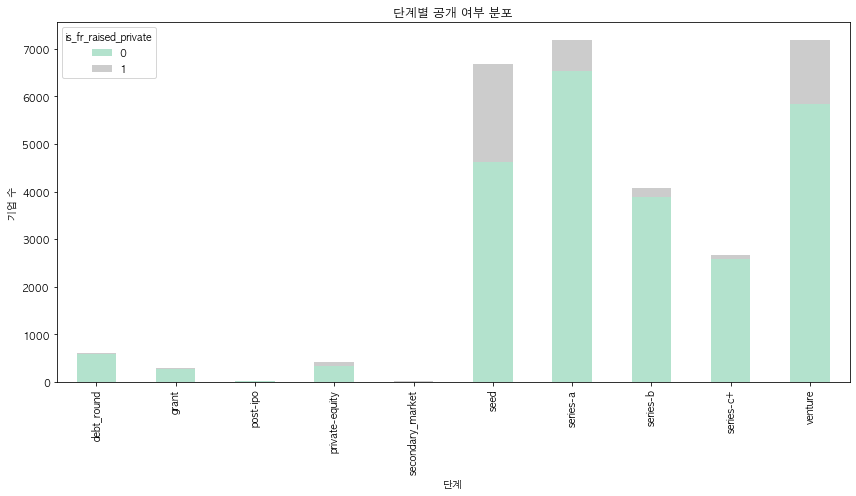

In [9]:
# 단계별 금액 공개 여부 차이 
# 산업별 price 가치 금액 공개 여부 차이 

val_pivot = (
    fr_company.groupby(['cat_fr_type', 'is_fr_raised_private'])['objects_cfpr_id']
    .nunique()
    .reset_index()
)

val_pivot = val_pivot.pivot(
    index='cat_fr_type',
    columns='is_fr_raised_private',
    values='objects_cfpr_id'
).fillna(0)

val_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='Pastel2'
)

plt.title('단계별 공개 여부 분포')
plt.xlabel('단계')
plt.ylabel('기업 수')
plt.tight_layout()
plt.show()


/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13824/1543098705.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


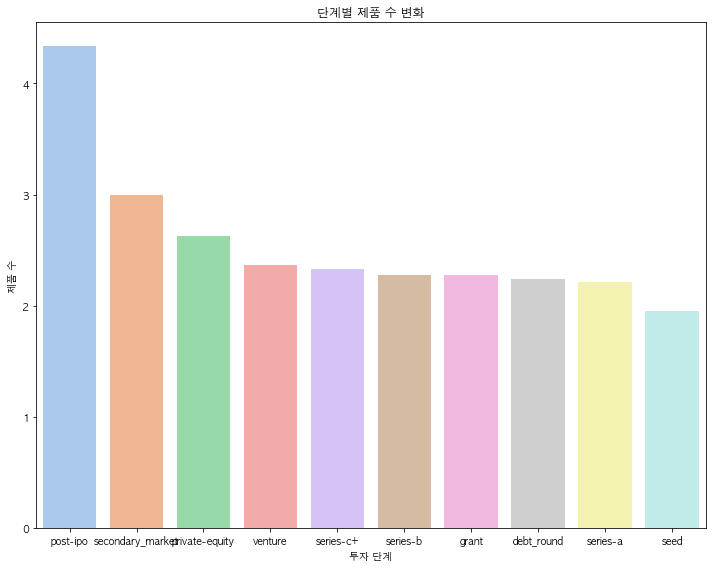

In [10]:
# 투자 라운드별 회사 제품 갯수 변화
# product ←> funding_rounds merge
company_product = (
    product
    .merge(FundingRounds, how='left', left_on='parent_c_id', right_on='fr_c_id')
)

# 회사별 제품 개수 계산
company_product_cnt = (
    company_product
    .groupby('parent_c_id')['objects_cfpr_id']
    .nunique()
    .reset_index(name='n_products')
)
# 3) 투자 라운드 테이블에 회사별 제품 수 붙이기
fr_with_products = (
    FundingRounds
    .merge(company_product_cnt, how='left',
           left_on='fr_c_id', right_on='parent_c_id')
)

# 4) 라운드 단계별 평균 제품 수
round_product_trend = (
    fr_with_products
    .groupby('cat_fr_type')['n_products']
    .mean()
    .reset_index()
    .sort_values('n_products', ascending=False)
)

# 시각화 
plt.figure(figsize=(10, 8))
sns.barplot(
    data=round_product_trend,
    x='cat_fr_type',
    y='n_products',
    palette='pastel'
)
plt.title('단계별 제품 수 변화')
plt.xlabel('투자 단계')
plt.ylabel('제품 수')
plt.tight_layout()
plt.show()


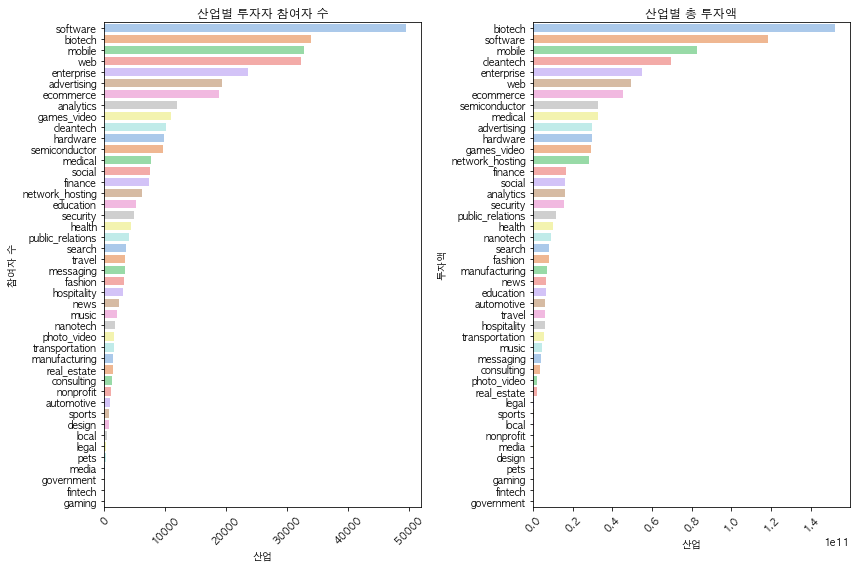

In [27]:
# 투자가 활발한 산업
# 참여자 수 기준
active_round_cnt = (fr_company
                .groupby('obj_category_filled')['participants']
                .sum()
                .reset_index()
                .sort_values('participants', ascending=False)
                )
# 투자 금액 
active_round_amount = (fr_company
                       .groupby('obj_category_filled')['raised_amount_usd']
                       .sum()
                       .reset_index()
                       .sort_values('raised_amount_usd', ascending=False)
                       )

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# 산업별 참여자 수 수평 막대 그래프
sns.barplot(data=active_round_cnt, x='participants', y='obj_category_filled', palette='pastel', hue='obj_category_filled', ax=axes[0])
axes[0].set_title('산업별 투자자 참여자 수')
axes[0].set_xlabel('산업')
axes[0].set_ylabel('참여자 수')
axes[0].tick_params(axis='x', rotation=45)


# 산업별 투자액 수평 막대 그래프
sns.barplot(data=active_round_amount, x='raised_amount_usd', y='obj_category_filled', palette='pastel', hue='obj_category_filled', ax=axes[1])
axes[1].set_title('산업별 총 투자액')
axes[1].set_xlabel('산업')
axes[1].set_ylabel('투자액')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## round_tempo 왜도 첨도 확인

In [13]:
round_tempo = (startup_system.sort_values(['fr_c_id','funded_at']))
round_tempo['prev_round_date'] = round_tempo.groupby('fr_c_id')['funded_at'].shift(1)

round_tempo['round_tempo_days'] = (round_tempo['funded_at'] - round_tempo['prev_round_date']).dt.days
round_tempo['round_tempo_months'] = round_tempo['round_tempo_days'] / 30

In [14]:
desc = (
    round_tempo
    .groupby('fr_c_id')['round_tempo_months']
    .describe()
    .reset_index()
)

In [15]:
from scipy import stats

print("Income skew:", stats.skew(round_tempo["round_tempo_months"].dropna()))
print("Income kurt:", stats.kurtosis(round_tempo["round_tempo_months"].dropna()))

Income skew: 9.06315298529788
Income kurt: 277.80508742061556


- **왜도가 크면(>1)** → 로그 변환 고려
- **첨도가 크면(>3)** → 이상치 처리 필요